In [9]:
import pandas as pd
import numpy as np

from pypecast.models import MLP, Simple_LSTM
from pypecast.features import BuildFeaturesSupervised

Using TensorFlow backend.


In [10]:
dummy = pd.read_csv('../data/example/dummy.csv')
dummy = dummy.Sales.loc[:35].apply(lambda x: float(x))
dummy.head()

0    266.0
1    145.9
2    183.1
3    119.3
4    180.3
Name: Sales, dtype: float64

#### Define n_lag and n_seq

In [3]:
n_lag = 2
n_seq = 3

bf = BuildFeaturesSupervised(n_lag, n_seq,difference=True,scaler_type='norm')

In [6]:
train, test = bf.transform_data(dummy)

In [7]:
model = Simple_LSTM(n_lag, n_seq, n_units=10)

In [8]:
model.fit(train,n_batch=1, n_epoch=10, early_stopping=True)

Train on 19 samples, validate on 5 samples
Epoch 1/10
 - 2s - loss: 0.1427 - val_loss: 0.1666
Epoch 2/10
 - 0s - loss: 0.1403 - val_loss: 0.1632
Epoch 3/10
 - 0s - loss: 0.1384 - val_loss: 0.1601
Epoch 4/10
 - 0s - loss: 0.1366 - val_loss: 0.1571
Epoch 5/10
 - 0s - loss: 0.1350 - val_loss: 0.1543
Epoch 6/10
 - 0s - loss: 0.1336 - val_loss: 0.1516
Epoch 7/10
 - 0s - loss: 0.1322 - val_loss: 0.1490
Epoch 8/10
 - 0s - loss: 0.1309 - val_loss: 0.1464
Epoch 9/10
 - 0s - loss: 0.1297 - val_loss: 0.1439
Epoch 10/10
 - 0s - loss: 0.1286 - val_loss: 0.1414
------------------------------------------------------------
Model trained


In [9]:
model.forecast_series(test)

[[0.019869264, -0.19543345, -0.09748163],
 [-0.16005312, 0.049961634, -0.08911788],
 [0.00021047518, -0.13479394, -0.048002623],
 [-0.07999244, -0.048986204, -0.08376924],
 [-0.09879005, 0.025527747, -0.010043962],
 [0.036004465, -0.22484595, -0.10250258],
 [-0.26516277, 0.19397485, -0.061366685]]

# Descriptor

In [10]:
from statsmodels.tsa import stattools as stt
from scipy import stats

In [1]:
from pypecast.descriptor import SeriesDescriptor

In [4]:
sd = SeriesDescriptor()

In [5]:
sd.describe(dummy)

-> Description of the series data:
            Sales
count   36.000000
mean   312.600000
std    148.937164
min    119.300000
25%    192.450000
50%    280.150000
75%    411.100000
max    682.000000


In [2]:
import pandas as pd
import numpy as np

In [3]:
from pypecast.descriptor import SeriesDescriptor
sd = SeriesDescriptor()

In [4]:
ser = np.random.rand(100)

-> Description of the series data:
                0
count  100.000000
mean     0.529206
std      0.283757
min      0.004374
25%      0.275571
50%      0.500429
75%      0.775171
max      0.993712
------------------------------------------------------------
------------------------------------------------------------


<Figure size 864x432 with 0 Axes>

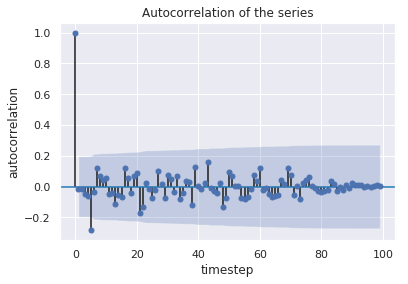

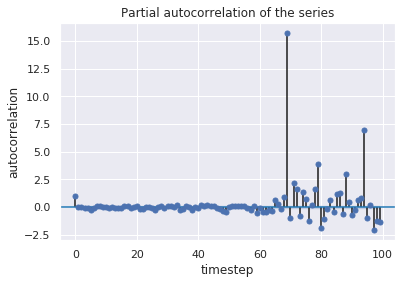

In [5]:
sd.full_report(ser)

In [9]:
plt.plot(ac)

NameError: name 'plt' is not defined